In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

In [4]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
data = pd.read_csv("heart_disease_data.csv")
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

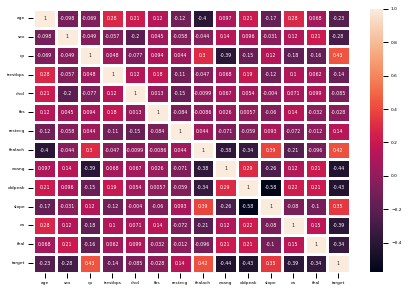

In [9]:
sns.set_context('paper',font_scale = 0.5)
sns.heatmap(data.corr(),annot=True,linewidth =3)
plt.tight_layout()

In [10]:
plt.savefig('corelation_matrix.png')

<Figure size 432x288 with 0 Axes>

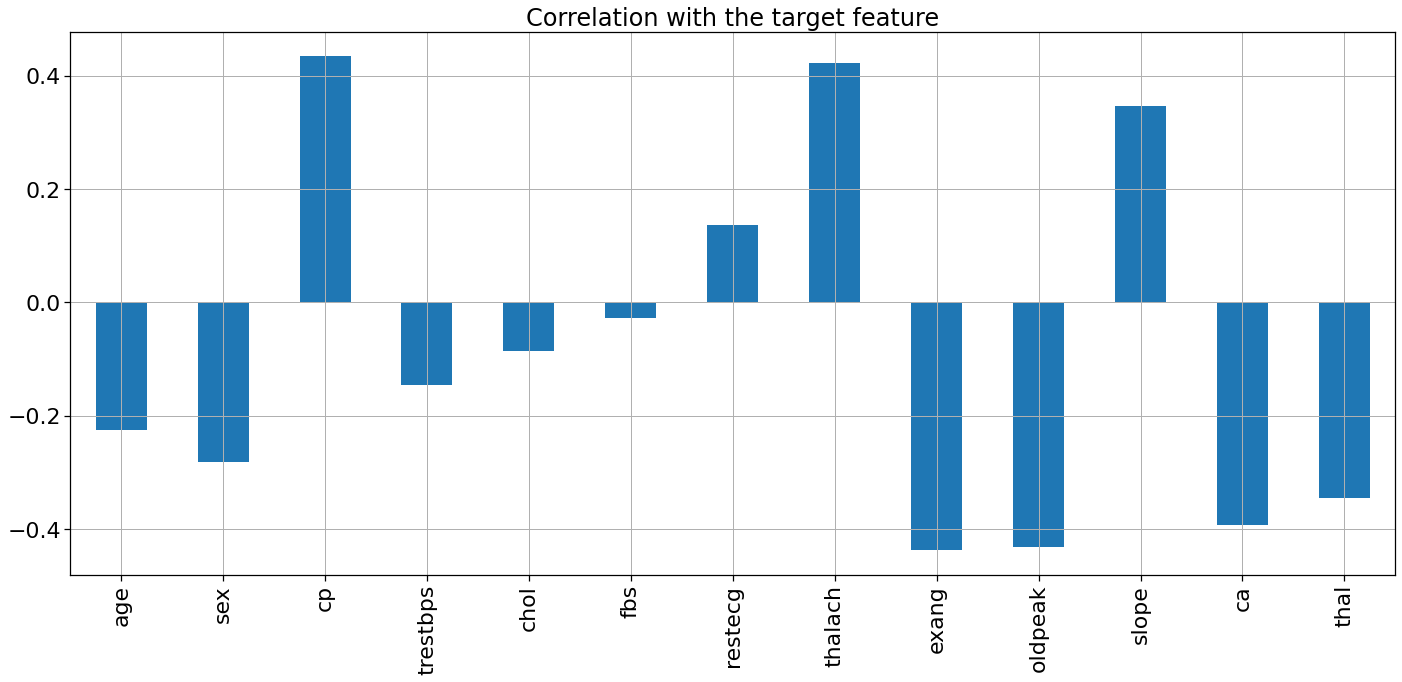

In [11]:
sns.set_context('notebook',font_scale = 2.0)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

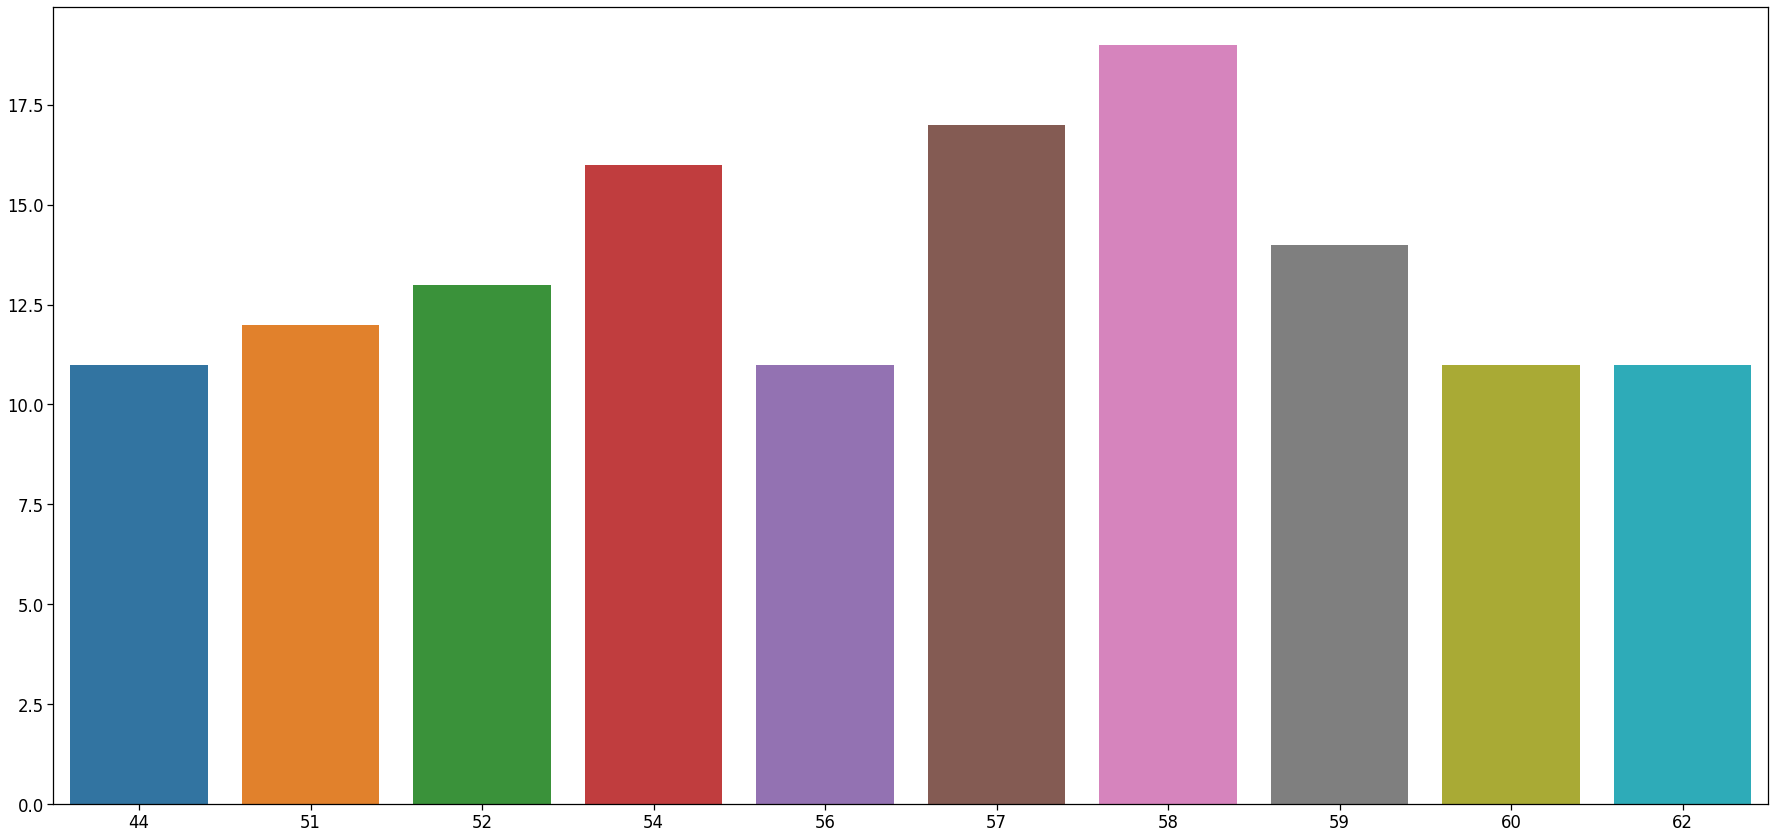

In [12]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

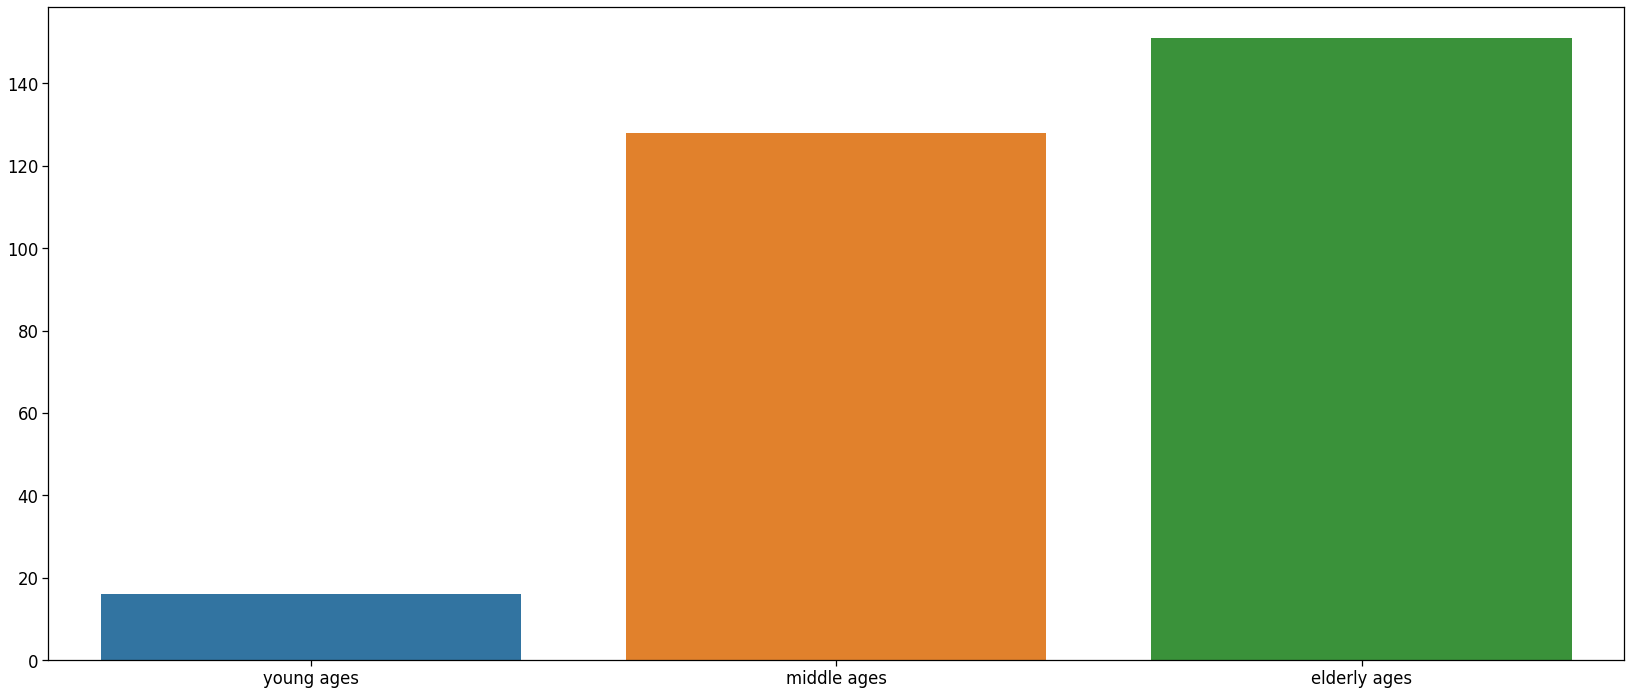

In [13]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



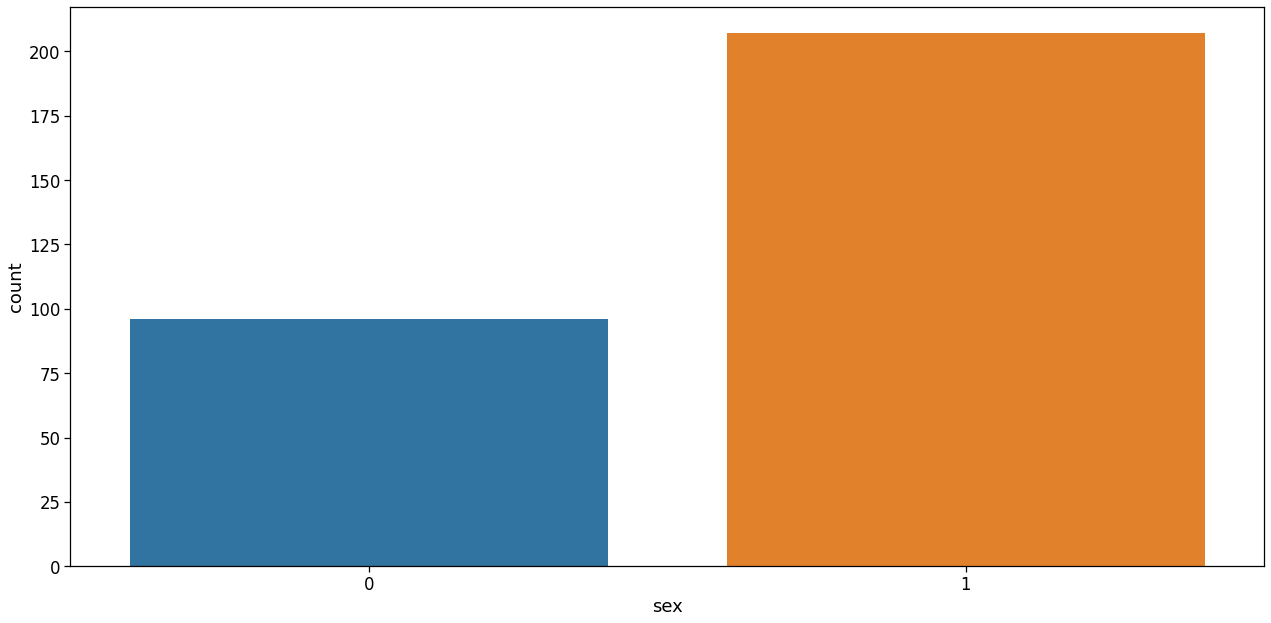

In [14]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



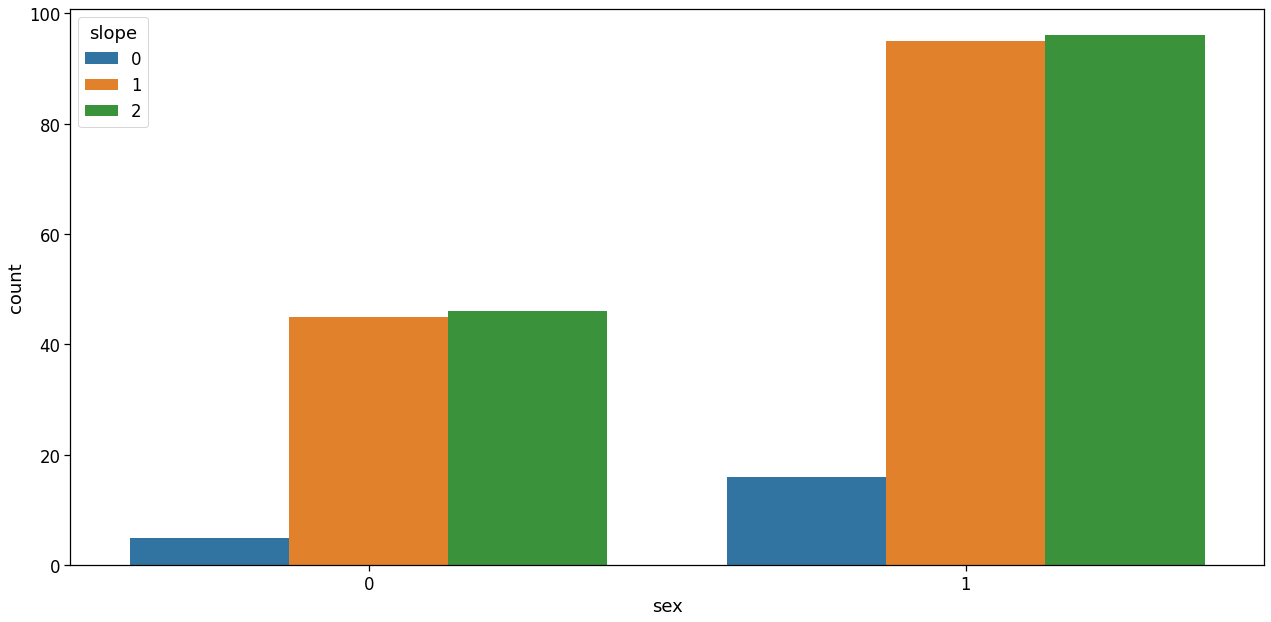

In [15]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



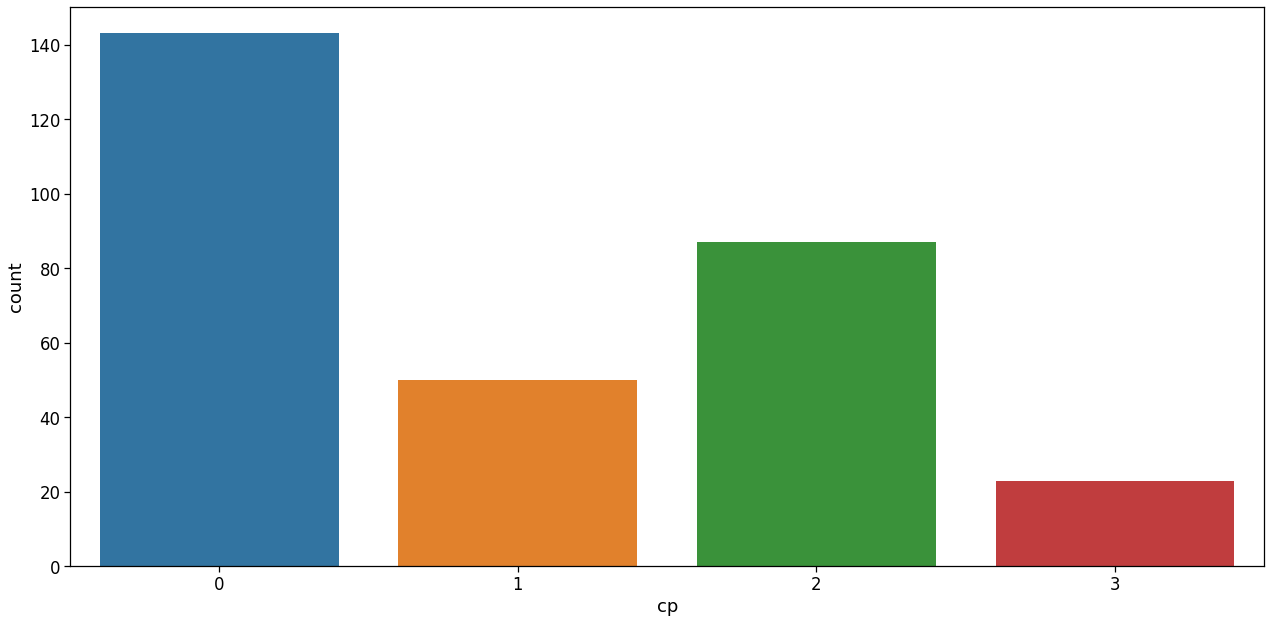

In [16]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



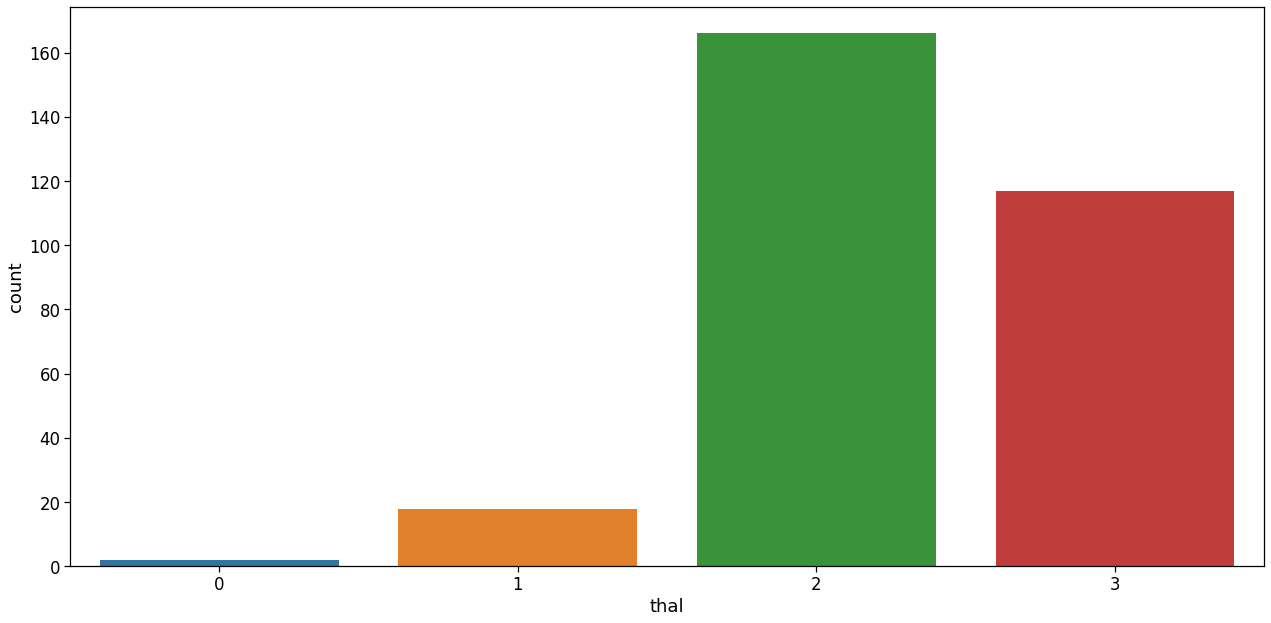

In [17]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



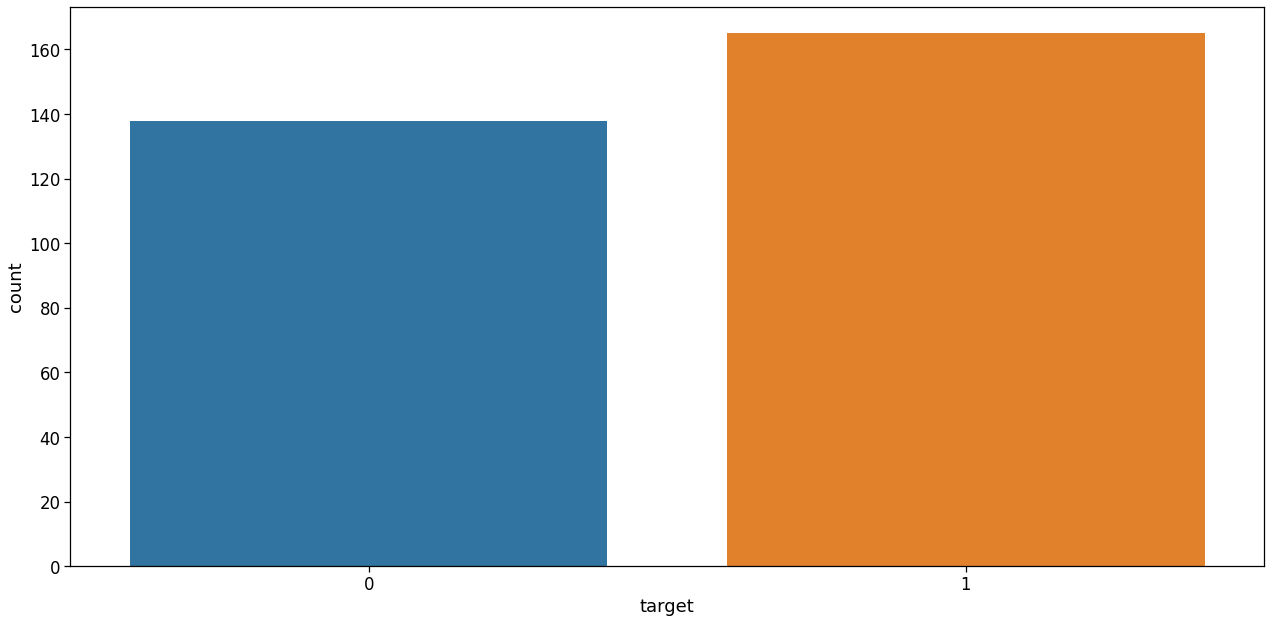

In [18]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



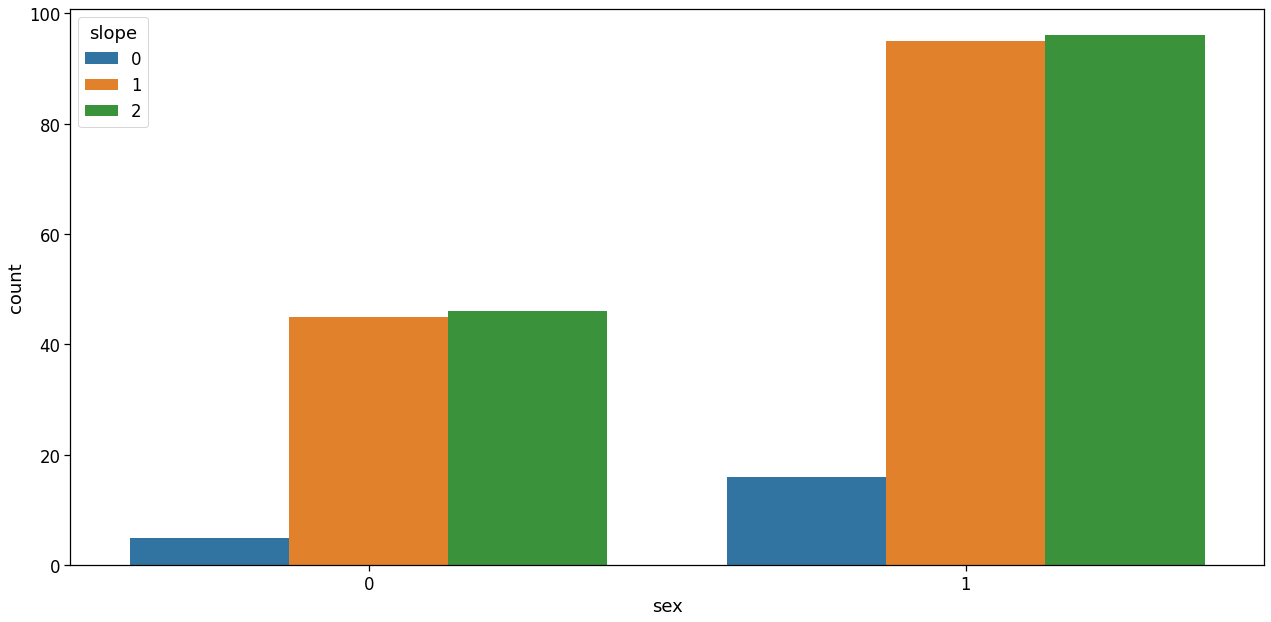

In [19]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



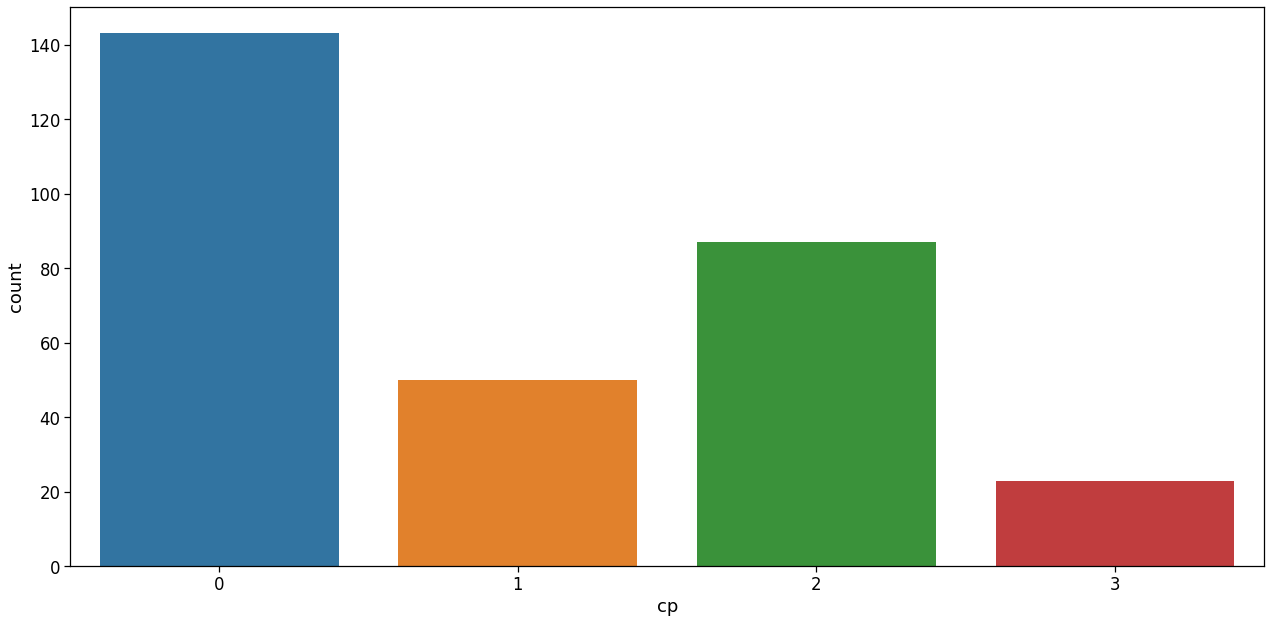

In [20]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



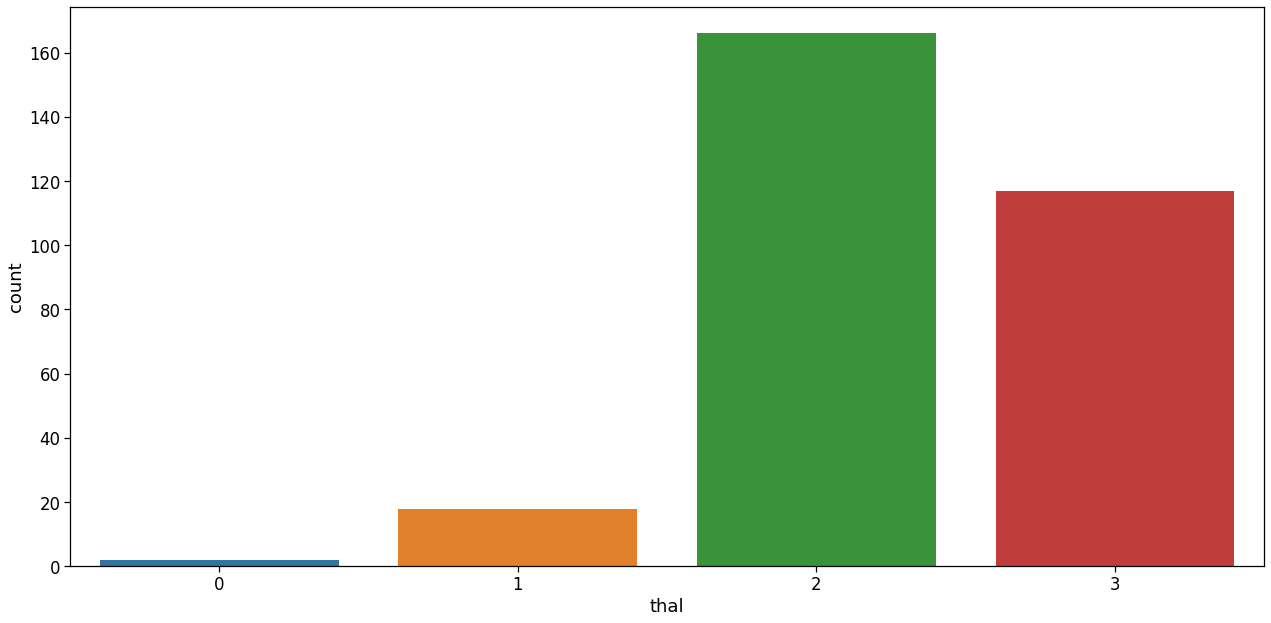

In [21]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

C:\Users\vala\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



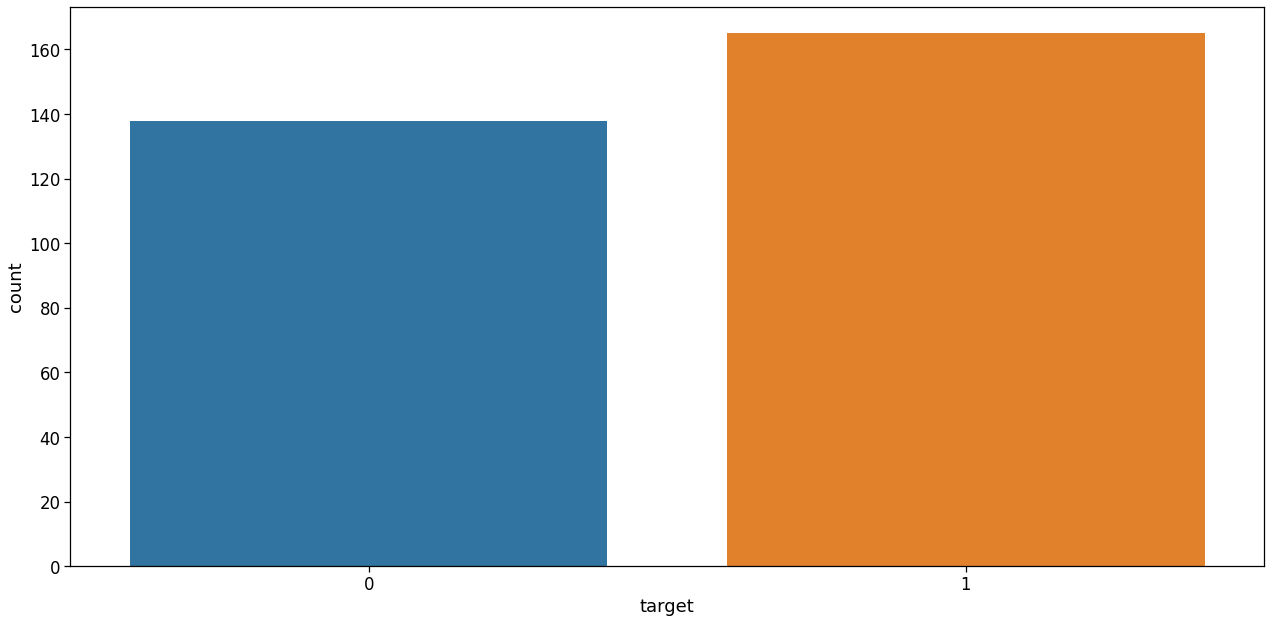

In [22]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

In [23]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [24]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [25]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [26]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [27]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.sample(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
213,0.731619,0.763956,1.173752,-0.159479,-0.034166,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
123,-0.040403,-1.349222,0.400733,0.758861,-0.896862,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
220,0.952197,1.049520,3.106300,0.190365,2.553921,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
232,0.069886,1.620649,0.825893,-0.203210,-0.206705,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
234,1.724218,-0.092738,1.463634,-1.777508,1.173608,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.819672131147541


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 74 to 172
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        242 non-null    float64
 1   trestbps   242 non-null    float64
 2   chol       242 non-null    float64
 3   thalach    242 non-null    float64
 4   oldpeak    242 non-null    float64
 5   sex_0      242 non-null    uint8  
 6   sex_1      242 non-null    uint8  
 7   cp_0       242 non-null    uint8  
 8   cp_1       242 non-null    uint8  
 9   cp_2       242 non-null    uint8  
 10  cp_3       242 non-null    uint8  
 11  fbs_0      242 non-null    uint8  
 12  fbs_1      242 non-null    uint8  
 13  restecg_0  242 non-null    uint8  
 14  restecg_1  242 non-null    uint8  
 15  restecg_2  242 non-null    uint8  
 16  exang_0    242 non-null    uint8  
 17  exang_1    242 non-null    uint8  
 18  slope_0    242 non-null    uint8  
 19  slope_1    242 non-null    uint8  
 20  slope_2  

In [30]:
import pickle

In [40]:
pickle.dump(dfs,open("heart_disease_Data.pkl", "wb"))

In [44]:
import joblib
joblib.dump(knn, 'heart_disease_knnmodel.pkl')

['heart_disease_knnmodel.pkl']